<a href="https://colab.research.google.com/github/ArberIvan/ArberIvan/blob/main/ARBER_Ivan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TIPILOGÍA DE BULONES EN OBRAS DE ESTRUCTURAS METÁLICAS**

Alumno: ARBER, Iván


Este trabajo es un analisis de un grupo de obras ya realizadas en distintas partes de argentina y construidas con distintos fines.
Se analizara particularmente una parte de estas estructuras, los bulones. Estos elementos son realmente caros y sobre todo son muy complicados de conseguir, generando grandes conflictos en los tiempos de obra, dilatandolos y creandose numerosos problemas monetarios a las empresas implicadas.
Estos problemas son debidos a la poca y mala oferta de empresas encargadas de hacerlos y "atando" a las empresas constructuras a acomodarse a estos inconvenientes, la manera que encontramos en nuestra empresa es la compra preventiva.
Con la compra preventiva generamos un respaldo para evitar grandes demoras en los montajes de las obras, para eso es muy importante poder prevenir que tipos de bulones se utilizan para cada tipo de obra.
Esto mismo es la finalidad de este estudio, intentar predecir que bulones se utilizaran en las obras dependiendo distintas variables como el tipo de elemento, la zona geografica, tipo de obra, etc.

LINK A LA PRESENTACIÓN:
https://docs.google.com/presentation/d/16z2DU_63UvoTMOVeo6kcRhxnJktDA9rNy3QYf794AVM/edit?usp=sharing

**PREGUNTAS-HIPÓTESIS GENERALES**
> Preguntas:
*   Cuales son los tipos de bulones segun diametro mas utilizados?
*   Hay alguna relacion entre los diametros y la clase que se pueda determinar segun los utilizados en las obras?
*   Para los distintos elementos (columnas, vigas, tensores, etc) hay un tipo de bulon mas utilizado? Esto varia segun el tipo de obra?
*   Hay alguna diferencia de cantidad o calidad de bulones entre las obras mineras y las obras de galpones? que porcentaje representa? es representativo?
*   Podriamos predecir con una un probabilidad alta que tipos de bulones y aproximar la cantidad a utilizar en una obra sabiendo los elementos (vigas, columnas, tensores, etc) que se utilizaran y sabiendo el tipo de obra?
*   La prediccion anterior podria determinarse segun que variables ademas de los elementos a conectar y el tipo de obra?, podriamos utilziar variables como la zona sismica, segun el cliente, provincia, etc?
*   Los materiales que son un factor importante en la resistencia del acero (F26, F36, etc) siempre van relacionados a la calidad y diametro del bulon? o depende del tipo de obra y sus solicitaciones (para el calculo de edificios mineros que normalmente estan en zonas sismicas se calculan con solicitaciones mas grandes y por ende sus elementos son mas pesados y robustos).
*   Existe una relacion entre la clase de bulon (calidad del mismo) con el peso de la pieza principal a conectar? hay alguna relacion dependiendo de que elemento se utiliza?
*   Prodiamos predecir sabiendo la obra y los elementos a conectar que tipos de bulones usariamos y la cantidad para poder hacer una compra previa aproximada?
*   Cuales son las conexiones mas tipicas dentro de la obra, cuanto representa en porcentaje cada tipo de conexion en una obra (por ejemplo, la union COLUMNA-VIGA representa un 60% de todas las conexiones y utiliza en el 80% de las veces bulones de 13mm de la clase A307X).

> Hipótesis:
*   1- Hay una relacion directa entre la clase de los bulones utilizados y los diametros con el tipo de obra que se realizara, es decir, para obras de galpones industriales se utilizaran diametros mas chicos y clases de bulones menos resistentes como el A307 y diametros del 10 y 13mm, y lo contrario sera en las obras mineras de zonas sismicas donde se veran mas bulones de 16 mm y superiores.
*   2- Hay una relacion directa entre cantidad de bulones con la cantidad de arandelas y tuercas, son minimos los casos donde se utiliza bulones con distintas cantidades de estos elementos.
*   3- Hay una cierta similitud de cantidad/calidad/diametro de bulones para los tipos conexiones entre elementos y por ende para las obras similares debido a que la empresa constructora (la que provee los datos) siempre va a intentar hacer lo mas simlilar posible las piezas para una fabricacion mas rapida en la industria y su posterior montaje en obra, ademas que los ingenieros siempre van a ser los mismos y van a tender a hacer algo similar siempre para hacer mas rapido el trabajo.
*   4- Vamos a encontrar una relacion casi directa (un porcentaje mayor al 80%) entre los tipos de perfiles utilizados y el tipo de obra, ya que los perfiles de espesores mayores se van a utilizar para obras mineras y no para galpones donde sus solicitaciones son mucho menores, por ende podriamos encontrar que estas obras con estos perfiles utilizan bulones de mayor diametro y largo.
*   Hay algun tipo de perfil tipico que se utilizan para los distintos prefijos? Discriminando segun el tipo de obra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

import plotly
import plotly.graph_objs as go
import plotly.express as px
import geopandas as gpd

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import requests
import sqlite3 as sql
import json
import sqlalchemy as db
from sqlalchemy import text
from googleapiclient.discovery import build

In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/data_science"
df= pd.read_csv("REPORTE_8_ENTREGA.csv",sep=";", encoding="latin-1")

Mounted at /content/gdrive
/content/gdrive/MyDrive/data_science


EXPLORACION DE LOS DATOS (EDA)

In [ ]:
df

,ID,OBRA,UBICACIÓN,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,CANT_TUERCAS,...,PREFIJO,PERFIL,MATERIAL,LONG,AREA,PESO,CONECTA1,CONECTA2,CONECTA3,CONECTA4
0,1,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
1,2,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
2,3,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,10,...,L,L32*3.2,F26,312.0,0.040,2.3,H53067,NaN,NaN,NaN
3,4,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,60,...,L,L32*3.2,F26,321.0,0.041,14.5,H53076,NaN,NaN,NaN
4,5,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,2,...,L,L32*3.2,F26,422.8,0.054,0.6,H53054,L53007,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,16248,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,16,A325X,64,4,8,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61021,NaN,NaN,NaN
16248,16249,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,20,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61047,A61047,NaN,NaN
16249,16250,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,64,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61049,A61048,NaN,NaN
16250,16251,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,4,...,V,PHI750-7.9-31.8*380-25.4*200,F36,11490.0,30.427,8167.2,A61015,NaN,NaN,NaN


Descripcion de variables:
---
* ID: ID de la pieza
* OBRA: Nombre de la obra
* UBICACION: Ubicacion de la obra
* NIVEL_SISMICO: Nivel sismico del lugar donde se emplaza la obra
* TIPO_OBRA: Que tipo de obra es, si es minera o una planta industrial
* DIAMETRO: Es el diametro del bulón
* CLASE: Es la calidad del bulón, dependiendo de la resistencia requerida
* LARGO: Es el largo del bulón
* CANTIDAD: Es la cantidad de bulones que tiene la pieza
* CANT_TUERCAS: Es la cantidad de tuercas que tiene la pieza
* CANT_ARAND: Es la cantidad de arandelas que tiene la pieza
* PREFIJO: Es el la denominacion de la pieza a la cual estan conectadas el bulon, por ejemplo "C" es columna, "V" es viga y asi.
* PERFIL: Es la denominacion del perfil que utilizamos por ejemplo 2T significa que es un perfil doble T.
* MATERIAL: Es la calidad del acero del perfil utilizado, tambien varia para cada obra o requerimiento
* LONG: Es la longitud del perfil donde se conectan los bulones
* AREA: Es el area del perfil donde se conectan los bulones
* PESO: Es el peso del perfil donde se conectan los bulones
* CONECTA1: Esto nos indica si el perfil principal esta conectado a otro elemento
* CONECTA2: Esto nos indica si el perfil principal esta conectado a otro elemento
* CONECTA3: Esto nos indica si el perfil principal esta conectado a otro elemento
* CONECTA4: Esto nos indica si el perfil principal esta conectado a otro elemento

Los conecta si estan vacio simplemente nos indica que no tiene mas elementos conectados, en este analisis los elementos principales (los que se mencionan con prefijos) solo pueden estar conectados hasta a 4 elementos.

In [ ]:
#Reviso la informacion de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             16252 non-null  int64  
 1   OBRA           16252 non-null  object 
 2   UBICACIÓN      16252 non-null  object 
 3   NIVEL_SISMICO  16252 non-null  int64  
 4   TIPO_OBRA      16252 non-null  object 
 5   DIAMETRO       16252 non-null  int64  
 6   CLASE          16252 non-null  object 
 7   LARGO          16252 non-null  int64  
 8   CANTIDAD       16252 non-null  int64  
 9   CANT_TUERCAS   16252 non-null  int64  
 10  CANT_ARAND     16252 non-null  int64  
 11  PREFIJO        16252 non-null  object 
 12  PERFIL         16252 non-null  object 
 13  MATERIAL       16252 non-null  object 
 14  LONG           16252 non-null  float64
 15  AREA           16252 non-null  float64
 16  PESO           16252 non-null  float64
 17  CONECTA1       16200 non-null  object 
 18  CONECT

In [ ]:
df.describe()

,ID,NIVEL_SISMICO,DIAMETRO,LARGO,CANTIDAD,CANT_TUERCAS,CANT_ARAND,LONG,AREA,PESO
count,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000,16252.000000
mean,8126.500000,1.788764,18.667549,54.533165,3.329375,9.452867,9.628723,3913.916564,4.465800,2319.896911
std,4691.692623,1.140163,4.014655,15.835598,2.517086,27.100738,27.230506,2949.062844,6.972551,10405.851765
min,1.000000,0.000000,10.000000,24.000000,1.000000,1.000000,0.000000,80.000000,0.009000,0.400000
25%,4063.750000,1.000000,16.000000,44.000000,2.000000,2.000000,2.000000,1433.700000,0.634000,45.700000
50%,8126.500000,2.000000,19.000000,51.000000,2.000000,4.000000,4.000000,3016.700000,1.762000,176.300000
75%,12189.250000,3.000000,19.000000,64.000000,4.000000,8.000000,8.000000,5620.800000,5.414000,825.050000
max,16252.000000,3.000000,32.000000,178.000000,30.000000,1136.000000,1136.000000,13524.600000,47.730000,184981.500000


Con esto vemos:

Hay mucha variedad en las variables de longitud, area y peso.
Hay 4 tipos de niveles sismicos (0, 1, 2, 3).
La media de las tuercas y arandelas son practicamente iguales.

##OBJETIVO

El objetivo elegido de mi trabajo es el analisis de los bulones entre sus 4 caracteristicas principales (clase, diametro, largo y cantidad) que me van a ayudar para realizar una compra previa a la finalizacion del detallamiento real de una pieza. voy a analizar primero con graficas univariadas y bivariadas para encontrar las relaciones que existen y algun insight, para esto yo voy a elegir previamente que variables a analizar.

Primero antes de comenzar mi analisis, voy a eliminar los elementos de prefijo "B" ya que estos son las barandas y no generan valor a mi analisis ya que por mas que cuando eleva el nivel sismico las barandas tienden a tener mayores secciones en sus piezas en los bulones no es asi.

In [ ]:
#Dataframe sin barandas (sin prefijo "B")
df = df[df['PREFIJO'] != 'B']
df

,ID,OBRA,UBICACIÓN,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,CANT_TUERCAS,...,PREFIJO,PERFIL,MATERIAL,LONG,AREA,PESO,CONECTA1,CONECTA2,CONECTA3,CONECTA4
0,1,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
1,2,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,6,...,L,L32*3.2,F26,246.2,0.032,1.1,H53018,NaN,NaN,NaN
2,3,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,10,...,L,L32*3.2,F26,312.0,0.040,2.3,H53067,NaN,NaN,NaN
3,4,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,60,...,L,L32*3.2,F26,321.0,0.041,14.5,H53076,NaN,NaN,NaN
4,5,LIEX,CATAMARCA,2,MINERA,13,A307,32,2,2,...,L,L32*3.2,F26,422.8,0.054,0.6,H53054,L53007,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,16248,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,16,A325X,64,4,8,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61021,NaN,NaN,NaN
16248,16249,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,20,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61047,A61047,NaN,NaN
16249,16250,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,64,...,V,HI600-7.9-25.4*250,F36,11990.0,26.223,3207.4,A61049,A61048,NaN,NaN
16250,16251,WHIRLP,BUENOS_AIRES,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,4,...,V,PHI750-7.9-31.8*380-25.4*200,F36,11490.0,30.427,8167.2,A61015,NaN,NaN,NaN


El diametro de los bulones y el nivel sismico quiero que sea una variable categorica y no numerica

In [ ]:
df_1 = df.copy()
df_1['DIAMETRO'] = df_1['DIAMETRO'].astype('object')
df_1['NIVEL_SISMICO'] = df_1['NIVEL_SISMICO'].astype('object')

In [ ]:
df_1["DIAMETRO"].info()
df_1["NIVEL_SISMICO"].info()

<class 'pandas.core.series.Series'>
Int64Index: 15187 entries, 0 to 16251
Series name: DIAMETRO
Non-Null Count  Dtype 
--------------  ----- 
15187 non-null  object
dtypes: object(1)
memory usage: 237.3+ KB
<class 'pandas.core.series.Series'>
Int64Index: 15187 entries, 0 to 16251
Series name: NIVEL_SISMICO
Non-Null Count  Dtype 
--------------  ----- 
15187 non-null  object
dtypes: object(1)
memory usage: 237.3+ KB


Chequeo de duplicados

In [ ]:
duplicados = df_1.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")


Número de filas duplicadas: 0


Hay gran cantidad de elementos iguales, esto es debido a que siempre se intenta igualar las piezas para evitar gran cantidad de piezas distintas.

La presencia de valores ausentes puede ser verificada de diversas maneras. Una opción es a través de un gráfico, como el que se muestra a continuación.

<Axes: >

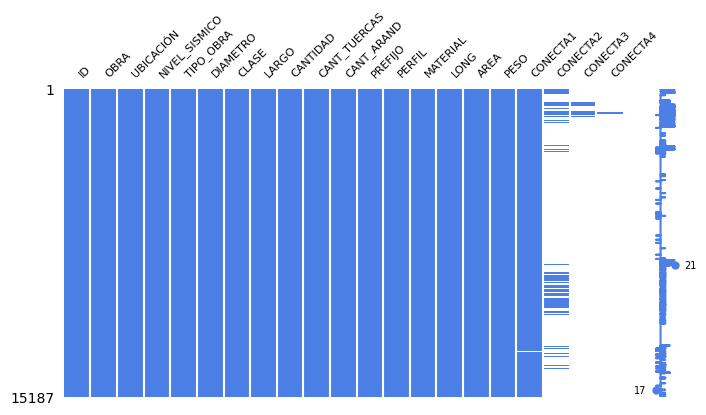

In [ ]:
import missingno as msno
msno.matrix(df_1, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

In [ ]:
df_1.isnull().sum()

ID                   0
OBRA                 0
UBICACIÓN            0
NIVEL_SISMICO        0
TIPO_OBRA            0
DIAMETRO             0
CLASE                0
LARGO                0
CANTIDAD             0
CANT_TUERCAS         0
CANT_ARAND           0
PREFIJO              0
PERFIL               0
MATERIAL             0
LONG                 0
AREA                 0
PESO                 0
CONECTA1            51
CONECTA2         12071
CONECTA3         14756
CONECTA4         14985
dtype: int64

Con esto vemos que la mayoria de los elementos se conectan solamente con otro elemento y son muy pocos los que tienen mas de 1 conexion, por eso crece de gran manera los nulos en los conecta. Por ende prefiero no eliminar estos nulos ya que me aportan informacion.

ANALISIS UNIVARIADO

Lo primero que analizaremos son las variables mas importantes de los bulones, si encontramos algunas que sean mas recurrentes que otras y por ende mas importantes.

ANALISIS DE CLASE DE LOS BULONES
Veamos si hay algun tipo de clase que mas se repite

In [ ]:
df_clase=df_1[['CANTIDAD','CLASE']]
pie_clase = df_clase.groupby('CLASE').agg('count')
pie_clase=pie_clase.rename(columns={'CANTIDAD': 'Frecuencia'})
pie_clase

,Frecuencia
CLASE,
A307,3195
A307-CUNA,24
A325-CUNA,1
A325N,9
A325N-FPB,1
A325X,8965
A325X-CUNA,46
A325X-FPB,2848
A325X-V,9


In [ ]:
import plotly.express as px
fig = px.pie(pie_clase, values='Frecuencia', \
             names=pie_clase.index, title='Cantidad de bulones por clase')
fig.show()

<ipython-input-30-f7b8fe65c88b>:3: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



Text(0, 0.5, 'Cantidad utilizada')

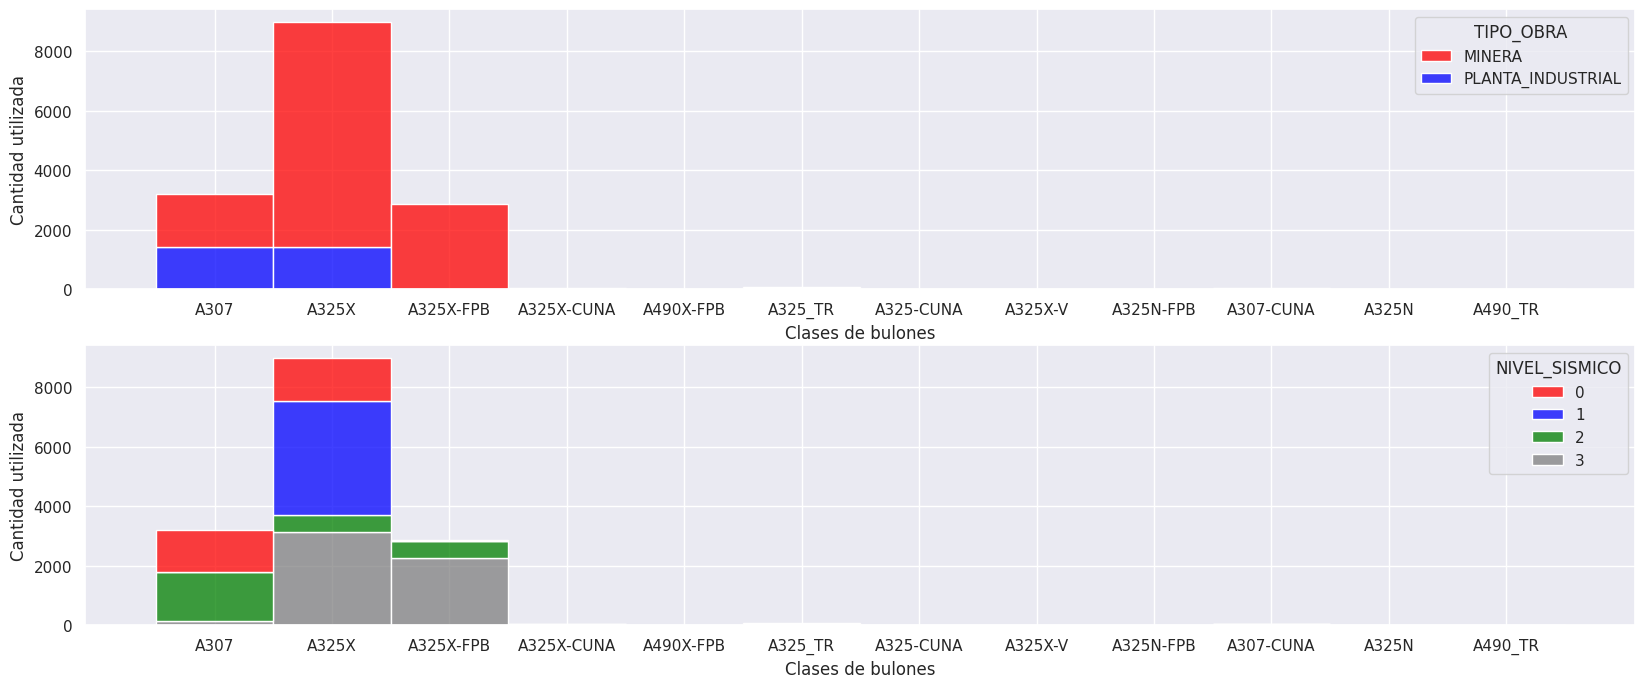

In [ ]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20, 8))
sns.histplot(data=df_1, x="CLASE",hue="TIPO_OBRA", ax=ax1, palette=["red", "blue", "green"], multiple='stack')
ax1.set_xlabel("Clases de bulones")
ax1.set_ylabel("Cantidad utilizada")
sns.histplot(data=df_1, x="CLASE",hue="NIVEL_SISMICO", ax=ax2, palette=["red", "blue", "green", "grey"], multiple='stack')
ax2.set_xlabel("Clases de bulones")
ax2.set_ylabel("Cantidad utilizada")

De estos dos graficos vemos una gran insight que es que los bulones mas importantes en este analisis son los A307, A325X y los A325X-FPB. Son la gran mayoria y por ende los que mas van "a mover la aguja" tanto en el gasto de la empresa.

ANALISIS DE DIAMETRO DE LOS BULONES

In [ ]:
df_diametro=df_1[['CANTIDAD','DIAMETRO']]
pie_diametro = df_diametro.groupby('DIAMETRO').agg('count')
pie_diametro=pie_diametro.rename(columns={'CANTIDAD': 'Frecuencia'})
fig = px.pie(pie_diametro, values='Frecuencia', \
             names=pie_diametro.index, title='Cantidad de bulones por diametro')
fig.show()

ANALISIS DE LARGO DE BULONES

<ipython-input-32-f7bc4a1dc2a7>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



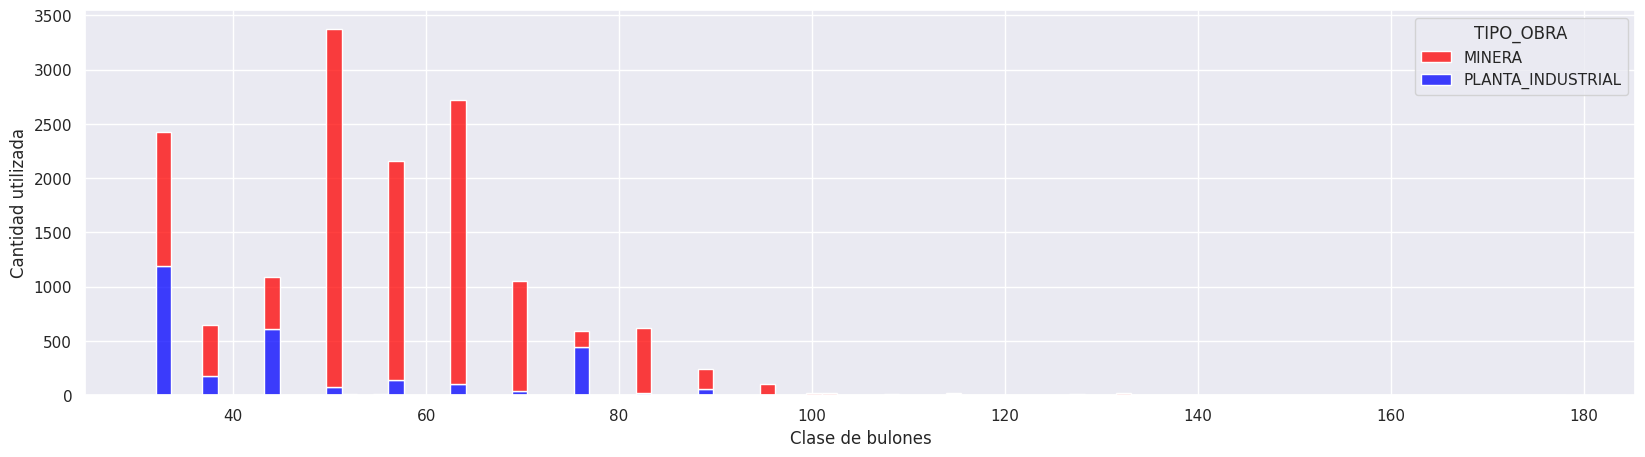

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="LARGO",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("Clase de bulones")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

ANALISIS DE PREFIJO DE ELEMENTOS UTILIZADOS:
Este es muy importante ya que vamos a ver que elementos son mas comunes

<ipython-input-33-e95262b1d3b5>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



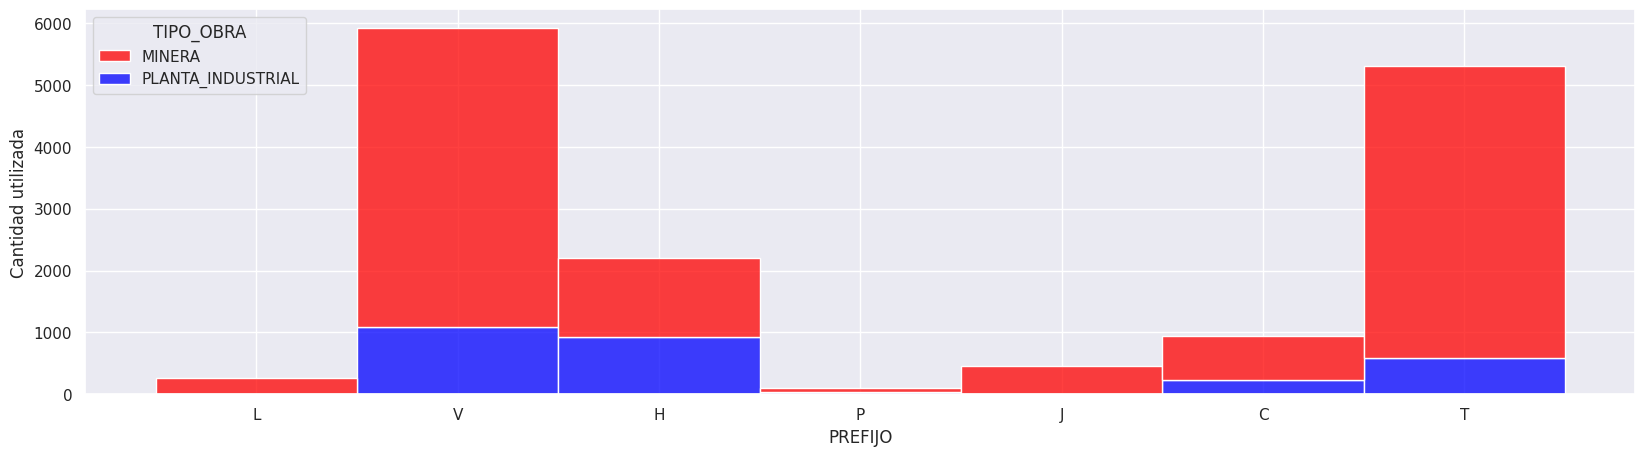

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="PREFIJO",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("PREFIJO")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

Con el grafico anterior casi que podemos descartar los elementos P y L (parantes y longitudinales) ya que son muy pocos.

ANALISIS CANTIDAD DE BULONES

<ipython-input-34-425a05a28ea0>:3: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



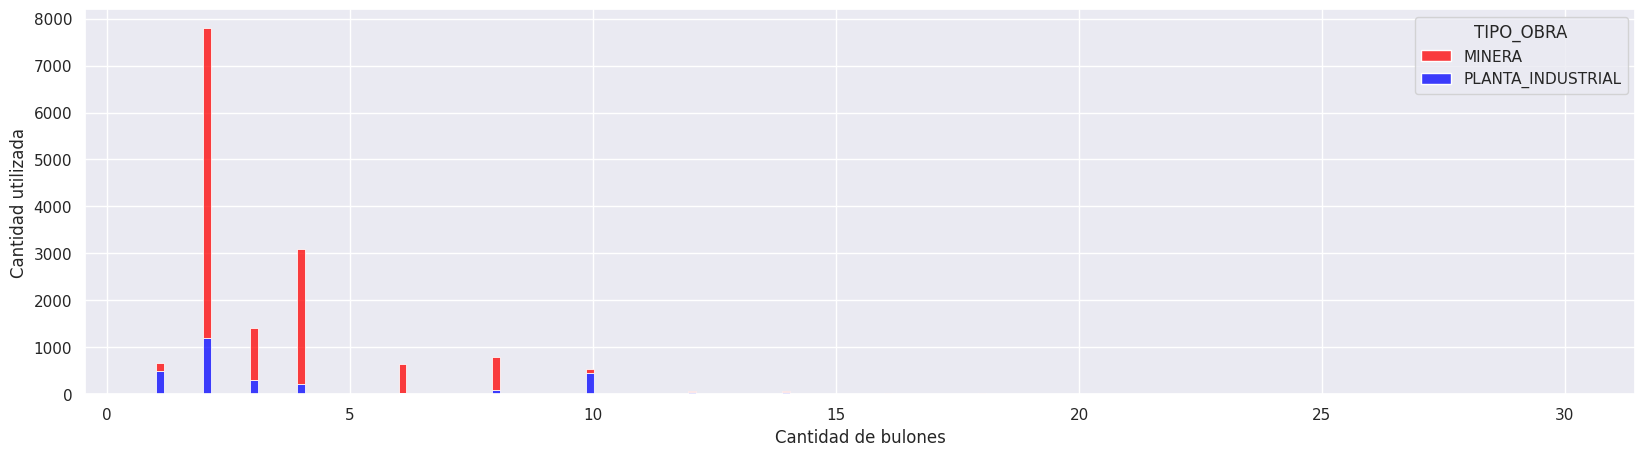

In [ ]:
sns.set(style="darkgrid")
fig, (ax1) = plt.subplots(1, 1,figsize=(20, 5))
sns.histplot(data=df_1, x="CANTIDAD",hue="TIPO_OBRA", palette=["red", "blue", "green","orange","grey"], multiple='stack')
ax1.set_xlabel("Cantidad de bulones")
ax1.set_ylabel("Cantidad utilizada")
plt.show()

**GRAFICO 3**

Ahora quiero analizar si hay algun tipo de relación entre los tipos de elementos que utlizamos en una obra con los diametros de bulones

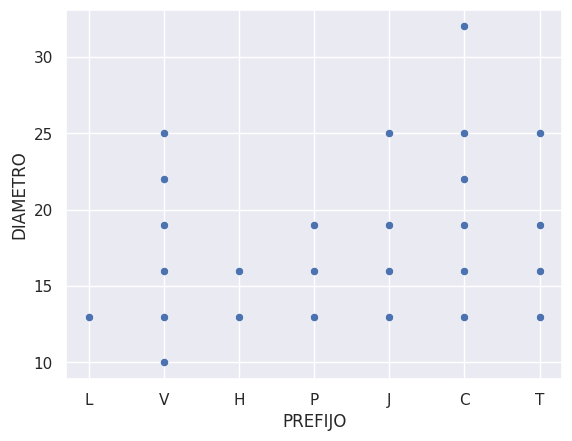

In [ ]:
sns.set(style="darkgrid")
sns.scatterplot(data=df_1, x="PREFIJO", y="DIAMETRO")
plt.show()

*ANALISIS/RECOMENDACION*

Con el grafico anterior vemos cuales son los diametros mas utilizados para cada tipo de elemento, en este caso se ve que para las vigas (V) y columnas  (C) se utiliza basicamente todos los tipos de diametros de bulones y que para las obras analizadas solo se utilizo bulones menores de 13mm para vigas, pero no para ningun otro elemento constructivo, es decir que se puede dar por hecho que cuando quieras comprar preventivamente bulones para algun elemento que no sea viga debera ser si o si de diametro mayor.

**GRAFICO 4**

Hacemos unos analisis de las clases y los elementos

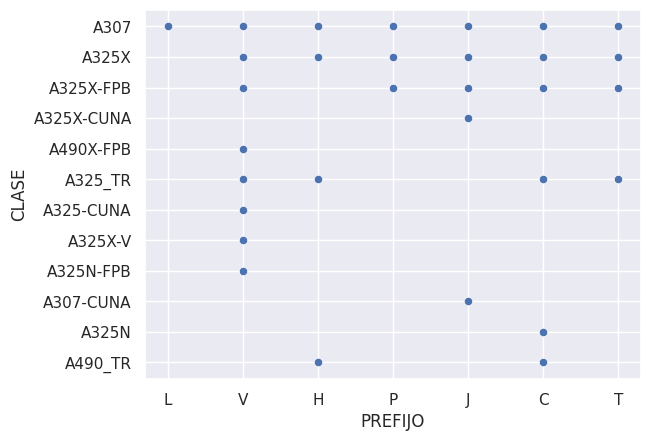

In [ ]:
sns.set(style="darkgrid")
sns.set(style="darkgrid")
sns.scatterplot(data=df_1, x="PREFIJO", y="CLASE")
plt.show()

*ANALISIS/RECOMENDACION*

Este grafico nos aporta tambien mucha informacion, ya que observamos que las "J" que son las jambas de las escaleras y las vigas son los unicos elementos que utilizan los bulones tipo cuña que son especiales para agarrarse a los perfiles UPN y por ende solo en estos elementos (J y V) se utilizan los UPN.

##Analisis multivariado adicional

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 24.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357555 sha256=a8414e41db35656af80ded235aa748a1d7f27f1f3df2a9694ca4e4624bc6b1d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-r_tnjhv3/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=914580

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_1)
profile.to_widgets()


In [ ]:
import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pandas_profiling.ProfileReport(df_1)

No me esta funcionando el profiling report y no encuentro porque, igualmente avanzo con el resto

<ipython-input-47-36b29f8b5e75>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



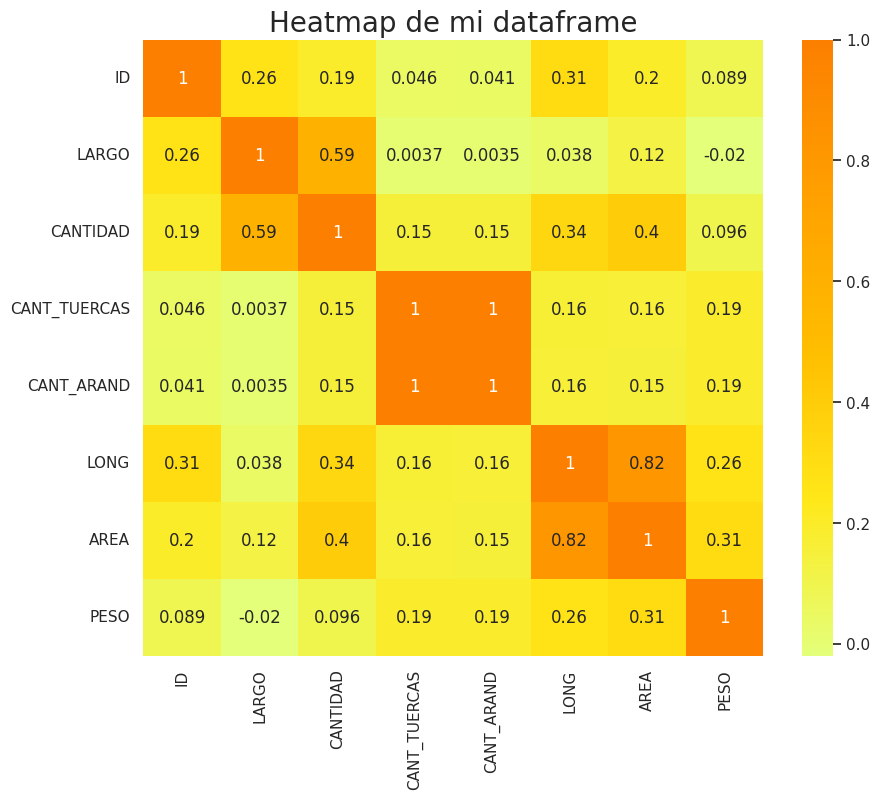

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)

sns.heatmap(df_1.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap de mi dataframe', fontsize = 20)
plt.show()

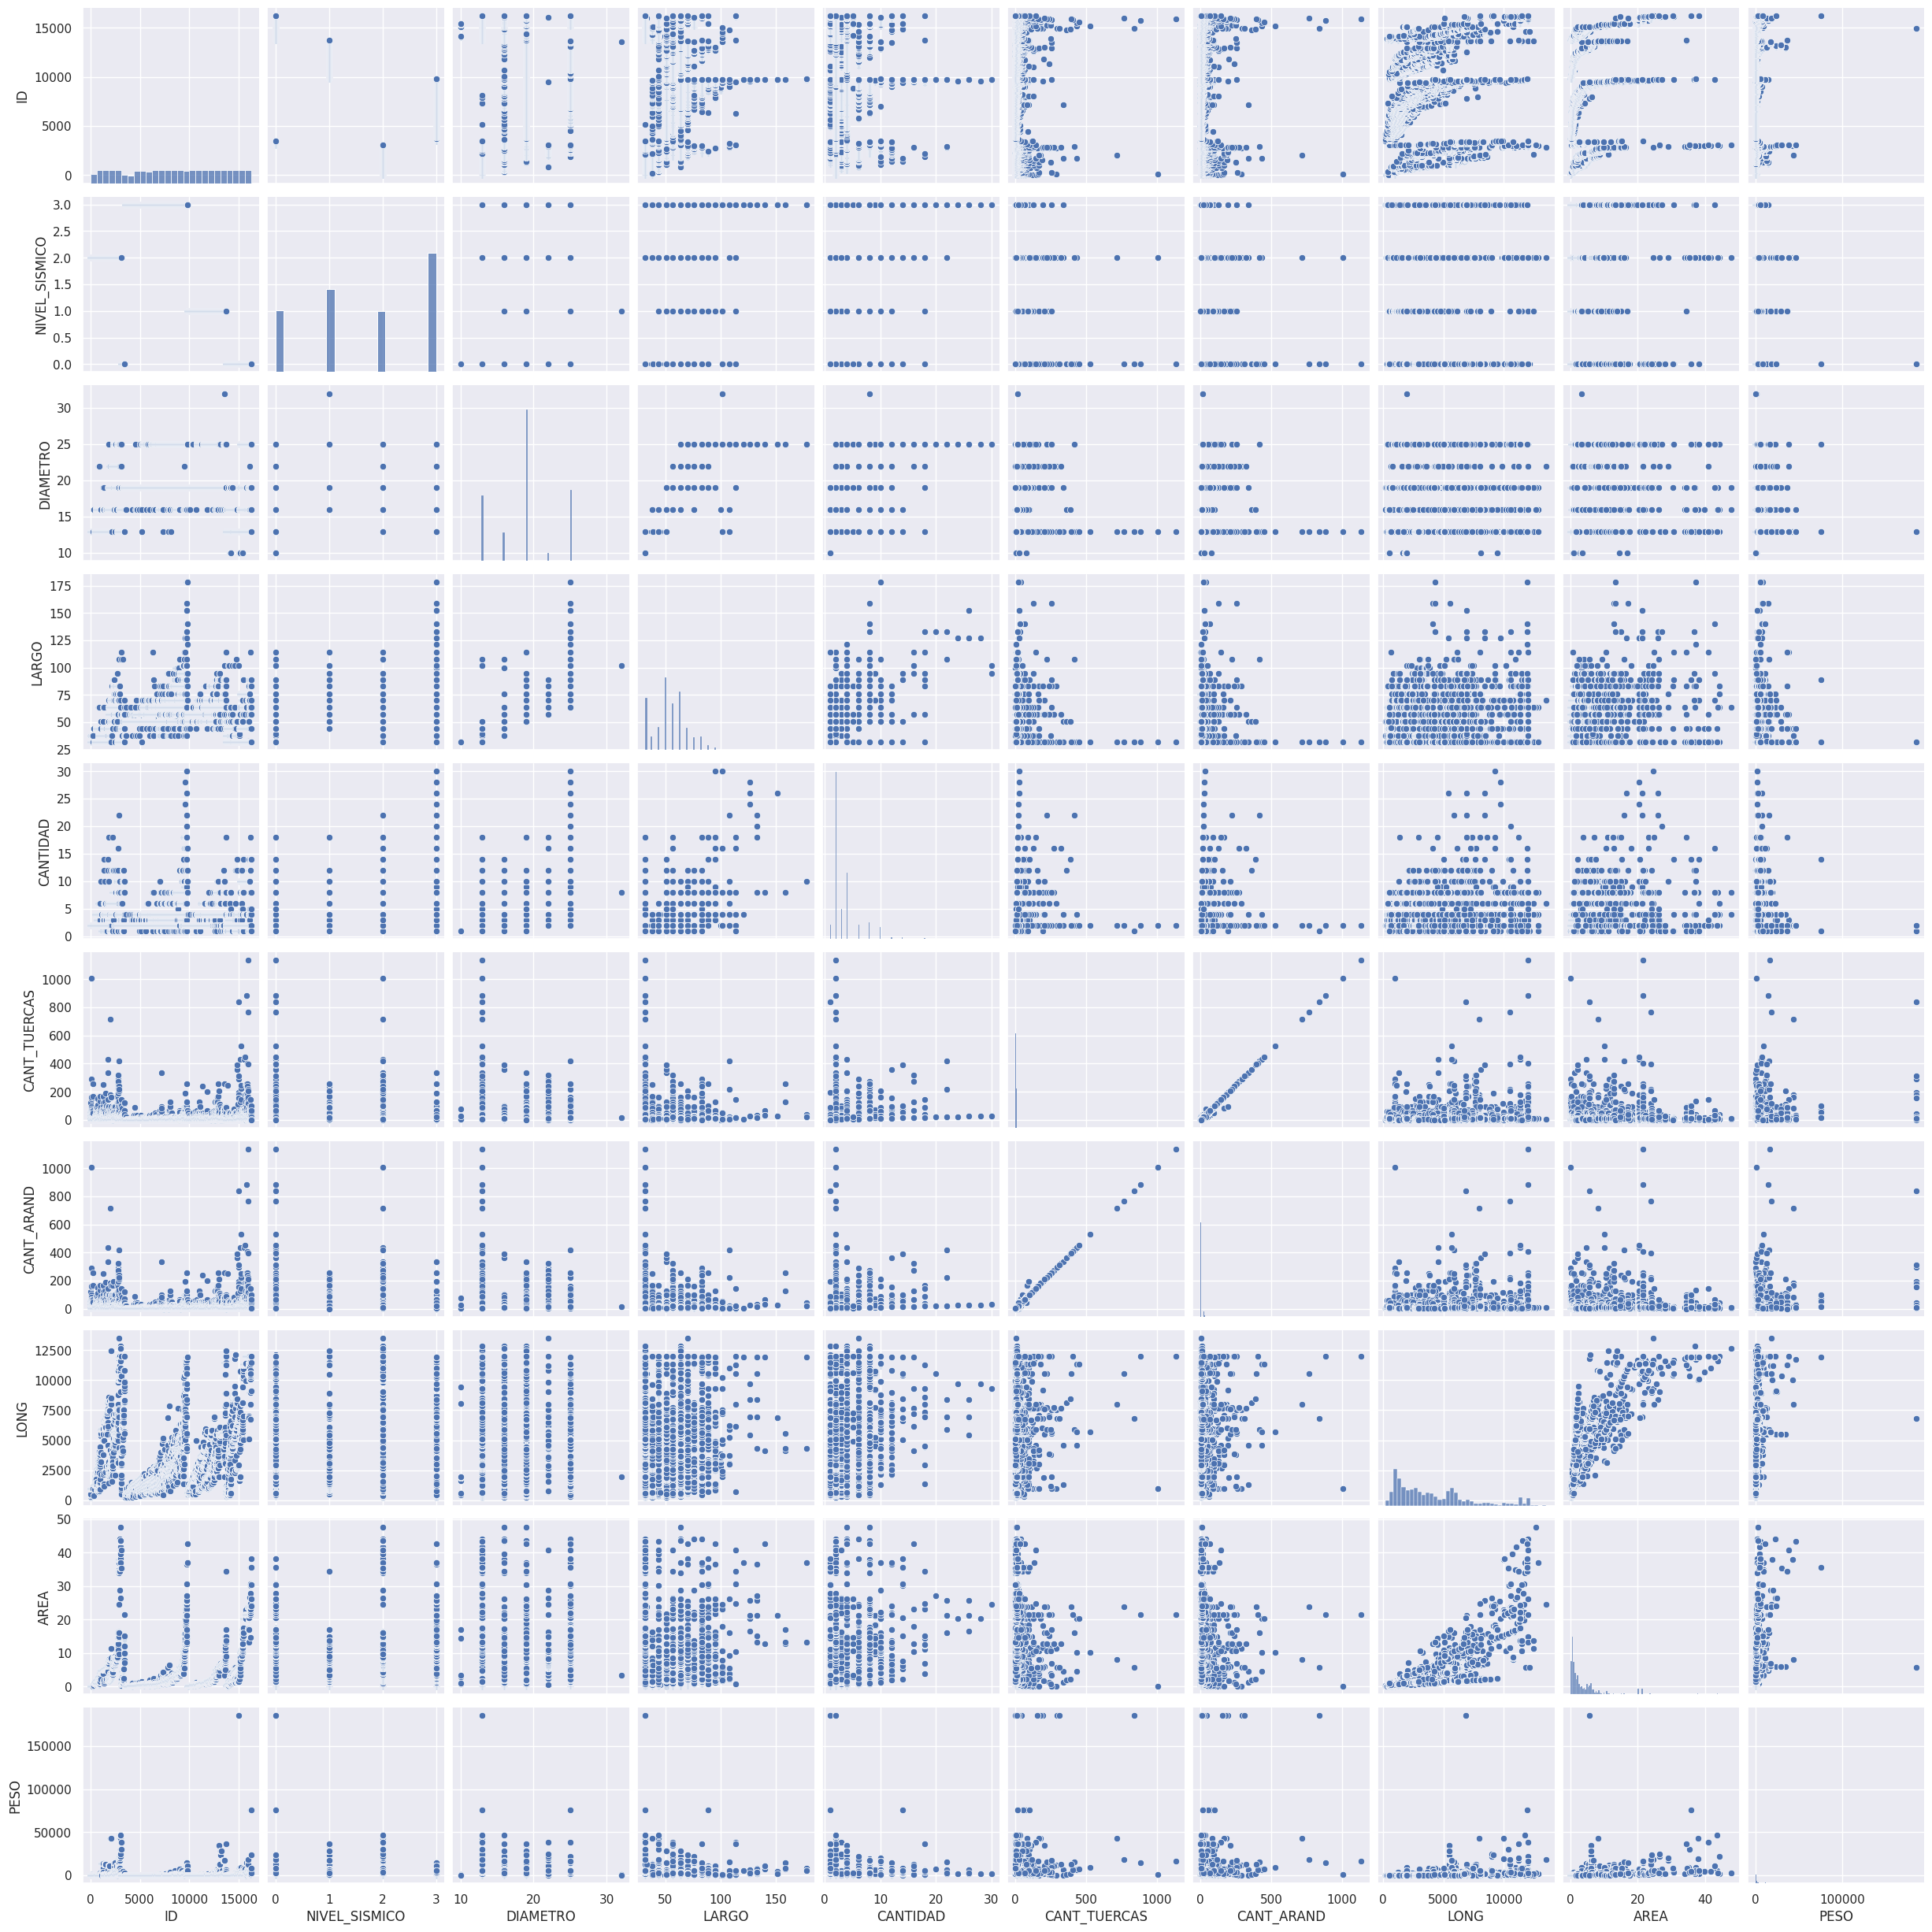

In [ ]:
sns.pairplot(data=df_1)

Text(0.5, 1.0, 'CANTIDAD/LARGO')

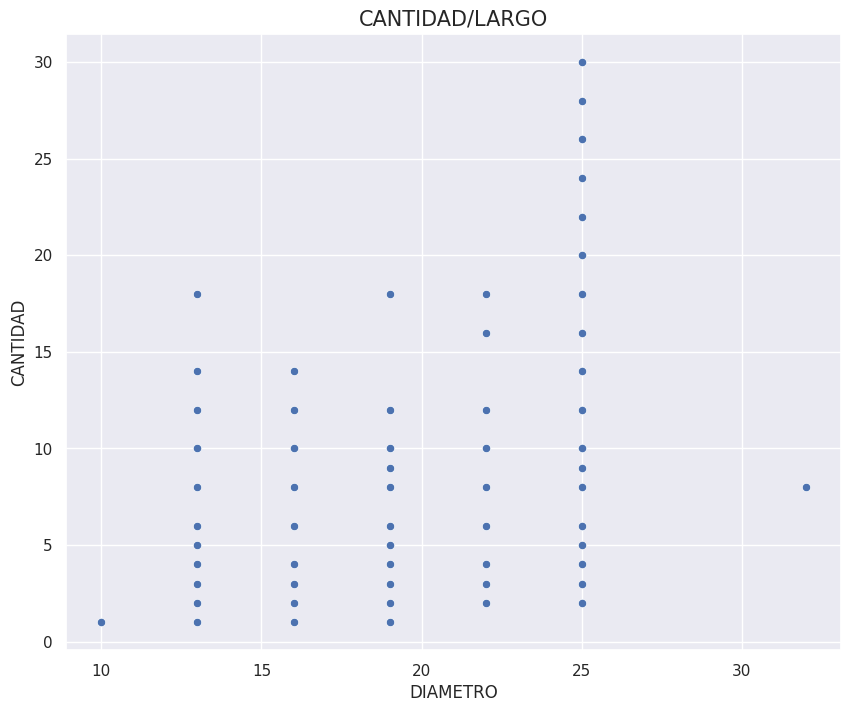

In [ ]:
sns.scatterplot(x="DIAMETRO", y="CANTIDAD", data=df_1)
plt.title('CANTIDAD/LARGO', fontsize = 15, fontweight = 15)

Text(0.5, 1.0, 'CANTIDAD DE TUERCAS/CANTIDAD DE ARANDELAS')

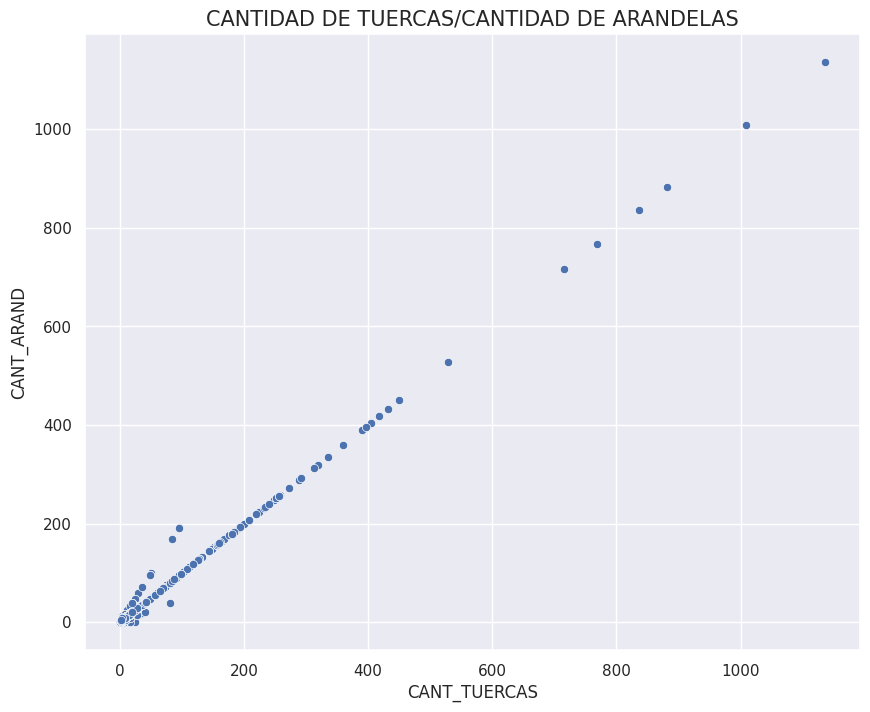

In [ ]:
sns.scatterplot(x="CANT_TUERCAS", y="CANT_ARAND", data=df_1)
plt.title('CANTIDAD DE TUERCAS/CANTIDAD DE ARANDELAS', fontsize = 15, fontweight = 15)

Vemos una gran correlacion entre las variables

Text(0.5, 1.0, 'CANTIDAD/AREA')

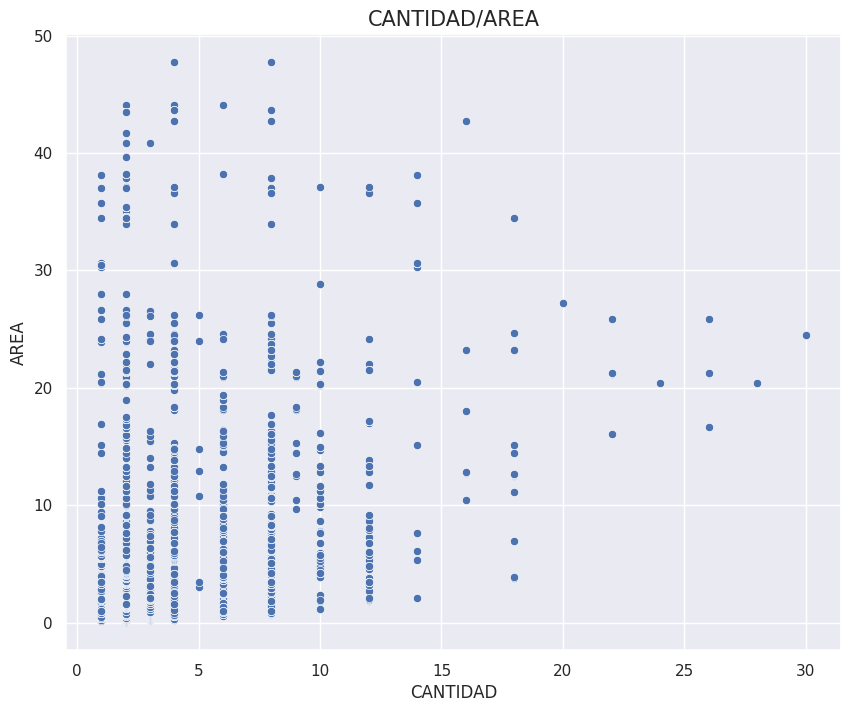

In [ ]:
sns.scatterplot(x="CANTIDAD", y="AREA", data=df_1)
plt.title('CANTIDAD/AREA', fontsize = 15, fontweight = 15)

In [ ]:
# Calculamos el coeficiente de correlacion entre Ranking y partidos ganados
correlation = df_1['CANTIDAD'].corr(df['AREA'])

# Imprimimos el coeficiente de correlacion
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: 0.40450306559785065


El coeficiente nos indica que hay una baja correlacion entre las variables, como ya lo podiamos ver en el grafico

#DATA WRANGLING
Nuevamente limpiamos el data sets para poder aplicar un modelo, en primer caso vamos a utilizar regresion lineal

In [ ]:
columnas_eliminadas = ['ID','UBICACIÓN','PERFIL','OBRA','MATERIAL','LONG','AREA','CANT_TUERCAS', 'CONECTA1', 'CONECTA2','CONECTA3','CONECTA4','CANT_ARAND']  # Lista con los nombres de las columnas a eliminar
df_2= df.drop(columns=columnas_eliminadas)

In [ ]:
#Como tambien observe que son pocos los tipos de CLASES que se utilizan, voy a utilizar las principales que son las mas representativas
#esas son A307, A325X, A325X-FPB, A325X-CUNA y A325-TR
df_2 = df_2[df['CLASE'].isin(['A307', 'A325X', 'A325X-FPB', 'A325X-CUNA', 'A325_TR'])]
df_2

,NIVEL_SISMICO,TIPO_OBRA,DIAMETRO,CLASE,LARGO,CANTIDAD,PREFIJO,PESO
0,2,MINERA,13,A307,32,2,L,1.1
1,2,MINERA,13,A307,32,2,L,1.1
2,2,MINERA,13,A307,32,2,L,2.3
3,2,MINERA,13,A307,32,2,L,14.5
4,2,MINERA,13,A307,32,2,L,0.6
...,...,...,...,...,...,...,...,...
16247,0,PLANTA_INDUSTRIAL,16,A325X,64,4,V,3207.4
16248,0,PLANTA_INDUSTRIAL,19,A325X-FPB,57,5,V,3207.4
16249,0,PLANTA_INDUSTRIAL,19,A325X-FPB,89,8,V,3207.4
16250,0,PLANTA_INDUSTRIAL,19,A325X-FPB,83,1,V,8167.2


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15127 entries, 0 to 16251
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NIVEL_SISMICO  15127 non-null  int64  
 1   TIPO_OBRA      15127 non-null  object 
 2   DIAMETRO       15127 non-null  int64  
 3   CLASE          15127 non-null  object 
 4   LARGO          15127 non-null  int64  
 5   CANTIDAD       15127 non-null  int64  
 6   PREFIJO        15127 non-null  object 
 7   PESO           15127 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [ ]:
df_2['NIVEL_SISMICO'] = df_2['NIVEL_SISMICO'].astype('int64')

Si quisiera seleccionar solo las columnas numericas para mis modelos de ML podria usar el codigo "df_data_num = df_1.select_dtypes(include="number")

REGRESION LINEAL

Voy a intentar predecir el diametro de los bulones segun el resto de columnas de mi df_2

Primero separo la variable objetivo (CLASE) de las caracteristicas

In [ ]:
X = df_2.drop(columns=['DIAMETRO'])
y = df_2['DIAMETRO']

In [ ]:
print("Características (X):")
print(X.columns)

print("\nVariable objetivo (y):")
print(y.head())

Características (X):
Index(['NIVEL_SISMICO', 'TIPO_OBRA', 'CLASE', 'LARGO', 'CANTIDAD', 'PREFIJO',
       'PESO'],
      dtype='object')

Variable objetivo (y):
0    13
1    13
2    13
3    13
4    13
Name: DIAMETRO, dtype: int64


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify = y_trainval)

In [ ]:
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(12101, 7) (9075, 7) (3026, 7) (3026, 7)


Esto nos indica la forma de cada uno de nuestros sets, siendo X_trainval el más grande y el que usaremos para procesar los datos que luego replicarlos en los otros conjuntos.

-En nuestro datasets que utilizaremos no tenemos valores nulos por lo cual no debemos realizar nada con esto

In [ ]:
# Lista de columnas numericas
columnas_numericas = ["NIVEL_SISMICO" , "LARGO" , "CANTIDAD" , "PESO"]
# Seleccion de columnas numericas
X_trainval_numerical_data = X_trainval[columnas_numericas]
X_train_numerical_data = X_train[columnas_numericas]
X_val_numerical_data = X_val[columnas_numericas]
X_test_numerical_data = X_test[columnas_numericas]

# Lista de columnas categóricas
columnas_categoricas = ["TIPO_OBRA","CLASE","PREFIJO"]
# Seleccion de columnas categóricas
X_trainval_categorical_data = X_trainval[columnas_categoricas]
X_train_categorical_data = X_train[columnas_categoricas]
X_val_categorical_data = X_val[columnas_categoricas]
X_test_categorical_data = X_test[columnas_categoricas]

Ahora normalizamos nuestras variables numericas de interes de acuerdo a los valores maximos y minimos de cada una, para eso primero vamos a hacer una funcion de normalizacion.

In [ ]:
# Funcion de normalizacion
def normalize(df_2):
    result = df_2.copy()

    for feature_name in df_2.columns:
        max_val = df_2[feature_name].max()
        min_val = df_2[feature_name].min()
        result[feature_name] = (df_2[feature_name] - min_val) / (max_val - min_val)

    return result

In [ ]:
X_trainval_numerical_data_norm = normalize(X_trainval_numerical_data[columnas_numericas])
X_train_numerical_data_norm = normalize(X_train_numerical_data[columnas_numericas])
X_val_numerical_data_norm = normalize(X_val_numerical_data[columnas_numericas])
X_test_numerical_data_norm = normalize(X_test_numerical_data[columnas_numericas])

Ahora aplicamos PCA

In [ ]:
pca_trainval = PCA()
X_trainval_numerical_data_norm_pca = pd.DataFrame(pca_trainval.fit_transform(X_trainval_numerical_data_norm))

Chequeamos la proporción de la varianza explicada por cada componente principal:

In [ ]:
pca_trainval.explained_variance_ratio_

array([0.86595521, 0.09413882, 0.0222187 , 0.01768727])

* Esto nos dice que la 1era columna explica el 86% del dataset original, que la 2da columna explica el 9.5% del dataset original, y así sucesivamente.
* Vamos a quedarnos con las primeras 2 columnas que logran explicar alrededor del 95% de nuestro dataset original.

In [ ]:
X_trainval_numerical_data_norm_pca_95 = X_trainval_numerical_data_norm_pca.iloc[:, :2]

Haremos lo mismo en el resto de los conjuntos de X:

In [ ]:
# PCA en X_train
pca_train = PCA()
X_train_numerical_data_norm_pca = pd.DataFrame(pca_train.fit_transform(X_train_numerical_data_norm))

Chequeamos la proporción de la varianza explicada por cada componente principal:

In [ ]:
pca_train.explained_variance_ratio_

array([0.86097368, 0.09977817, 0.02282234, 0.01642581])

Similar a X_trainval, nos indica que la 1era columna explica el 86% del dataset original, que la 2da columna explica el 9.5% del dataset original, y así sucesivamente.

Vamos a quedarnos con las primeras 2 columnas que logran explicar cerca del 95% de nuestro dataset original.

In [ ]:
X_train_numerical_data_norm_pca_95 = X_train_numerical_data_norm_pca.iloc[:, :2]

Ahora, con X_val:

In [ ]:
# PCA en X_val
pca_val = PCA()
X_val_numerical_data_norm_pca = pd.DataFrame(pca_val.fit_transform(X_val_numerical_data_norm))

Chequeamos la proporción de la varianza explicada por cada componente principal:

In [ ]:
pca_val.explained_variance_ratio_

array([0.84443357, 0.10793644, 0.02599275, 0.02163723])

En este caso, la 1era columna explica casi el 85% del dataset original, la 2da columna explica el 10% del dataset original, y así sucesivamente.

Vamos a quedarnos con las primeras 2 columnas que logran explicar casi el 95% de nuestro dataset original.

In [ ]:
X_val_numerical_data_norm_pca_95 = X_val_numerical_data_norm_pca.iloc[:, :2]

Finalmente, repetimos para X_test:

In [ ]:
# PCA en X_test
pca_test = PCA()
X_test_numerical_data_norm_pca = pd.DataFrame(pca_test.fit_transform(X_test_numerical_data_norm))

Chequeamos la proporción de la varianza explicada por cada componente principal:

In [ ]:
pca_test.explained_variance_ratio_

array([0.85889482, 0.09815259, 0.02343858, 0.01951401])

Esto nos dice que la 1era columna explica casi el 85% del dataset original, la 2da columna explica el 10% del dataset original, y así sucesivamente.

Vamos a quedarnos con las primeras 2 columnas que logran explicar el 95% de nuestro dataset original.

In [ ]:
X_test_numerical_data_norm_pca_95 = X_test_numerical_data_norm_pca.iloc[:, :2]

Ahora hago one-hot encoding para las variables categoricas que voy a utilizar dentro de mi modelo que voy a tener que pasarlas a numericas

In [ ]:
def encode_categorical_data(data, encoder):
    enc_teams = encoder.transform(data)
    return pd.DataFrame(data=enc_teams, columns=encoder.get_feature_names_out())

columnas_categoricas = ["TIPO_OBRA","CLASE","PREFIJO"]

ohe = OneHotEncoder(sparse_output=False)

# Aplico one-hot encoding (con fit_transform) a las variables categóricas de X_trainval
enc_teams_trainval = ohe.fit_transform(X_trainval_categorical_data[columnas_categoricas])
X_trainval_categorical_data_encoded = pd.DataFrame(data=enc_teams_trainval, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_train
enc_teams_train = ohe.transform(X_train_categorical_data[columnas_categoricas])
X_train_categorical_data_encoded = pd.DataFrame(data=enc_teams_train, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_val
enc_teams_val = ohe.transform(X_val_categorical_data[columnas_categoricas])
X_val_categorical_data_encoded = pd.DataFrame(data=enc_teams_val, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_test
enc_teams_test = ohe.transform(X_test_categorical_data[columnas_categoricas])
X_test_categorical_data_encoded = pd.DataFrame(data=enc_teams_test, columns=ohe.get_feature_names_out())

X_trainval_categorical_data_encoded.shape, X_train_categorical_data_encoded.shape, X_val_categorical_data_encoded.shape, X_test_categorical_data_encoded.shape

((12101, 14), (9075, 14), (3026, 14), (3026, 14))

Ahora unimos los datasets

In [ ]:
# Listo los conjuntos para resetear sus índices
dataframes_to_reset = [X_trainval, X_train, X_val, X_test]
numerical_data_to_reset = [X_trainval_numerical_data_norm, X_train_numerical_data_norm, X_val_numerical_data_norm, X_test_numerical_data_norm]
categorical_data_to_reset = [X_trainval_categorical_data_encoded, X_train_categorical_data_encoded, X_val_categorical_data_encoded, X_test_categorical_data_encoded]
numerical_data_pca_to_reset = [X_trainval_numerical_data_norm_pca_95, X_train_numerical_data_norm_pca_95, X_val_numerical_data_norm_pca_95, X_test_numerical_data_norm_pca_95]
y_to_reset = [y_trainval, y_train, y_val, y_test]

# Realizo el reset de los índices con FOR
for dataset in dataframes_to_reset:
    dataset.reset_index(drop=True, inplace=True)

for numerical_data in numerical_data_to_reset:
    numerical_data.reset_index(drop=True, inplace=True)

for categorical_data in categorical_data_to_reset:
    categorical_data.reset_index(drop=True, inplace=True)

for numerical_data_pca in numerical_data_pca_to_reset:
    numerical_data_pca.reset_index(drop=True, inplace=True)

for target in y_to_reset:
    target.reset_index(drop=True, inplace=True)


In [ ]:
# Uno los dataframes por columnas

# Redefinimos X_trainval con las columnas numericas con PCA y las categóricas codificadas
X_trainval = pd.concat([X_trainval_numerical_data_norm_pca_95, X_trainval_categorical_data_encoded], axis=1)

# Redefinimos X_train con las columnas numericas con PCA y las categóricas codificadas
X_train = pd.concat([X_train_numerical_data_norm_pca_95, X_train_categorical_data_encoded], axis=1)

# Redefinimos X_val con las columnas numericas con PCA y las categóricas codificadas
X_val = pd.concat([X_val_numerical_data_norm_pca_95, X_val_categorical_data_encoded], axis=1)

# Redefinimos X_test con las columnas numericas con PCA y las categóricas codificadas
X_test = pd.concat([X_test_numerical_data_norm_pca_95, X_test_categorical_data_encoded], axis=1)

In [ ]:
X_trainval.shape, X_train.shape, X_val.shape, X_test.shape

((12101, 16), (9075, 16), (3026, 16), (3026, 16))

In [ ]:
print("Número total de clases:", y.nunique())
print("Cantidad por clase:\n", y.value_counts())

Número total de clases: 7
Cantidad por clase:
 19    7058
25    3309
13    3039
16    1324
22     367
10      27
32       3
Name: DIAMETRO, dtype: int64


Es decir que estamos en presencia de un problema de clasificación entre 7 posibles resultados, y que además las clases no estan balanceadas ya que es raro los bulones de 32 mm de diametro frente a los de 19 mm. Veamos estas opciones de modelos:

Analizando un poco la ventaja de cada tipo de modelo:

Árbol de decisión: Este modelo es fácil de entender y visualizar. Puede manejar tanto datos categóricos como numéricos. Sin embargo, un solo árbol de decisión puede ser inestable y propenso a sobreajustar los datos.

Random Forest: Es un conjunto de árboles de decisión. Tiene todas las ventajas de los árboles de decisión, pero al ser un método de conjunto, es más robusto y menos propenso al sobreajuste.

Regresión logística: Es un modelo simple y eficiente para problemas de clasificación binaria, pero también se puede usar para problemas de clasificación multiclase. Proporciona probabilidades para las predicciones y es fácil de implementar.

K-Nearest Neighbors (KNN): Este es un modelo basado en instancia que es fácil de entender e implementar. No hace suposiciones sobre los datos, lo que puede ser útil si tus datos no cumplen con las suposiciones hechas por otros modelos.

Support Vector Machine (SVM): Este modelo puede manejar datos de alta dimensión y es efectivo cuando el número de dimensiones es mayor que el número de muestras. También es versátil ya que se pueden especificar diferentes funciones del núcleo para la función de decisión.

Veamos los valores que nos devuelve cada uno, por separado.

In [ ]:
# Convierto todas las variables a nombres de tipo cadena (string)
X_trainval.columns = X_trainval.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Lista de modelos a comparar y sus parámetros
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Regresión Logística", LogisticRegression(solver='liblinear')),
    ("KNN = 4", KNeighborsClassifier(n_neighbors=4)),
    ("KNN = 5", KNeighborsClassifier(n_neighbors=5)),
    ("SVM Lineal", SVC(C = 1.0, kernel='linear'))
]

df_f1_metrics = pd.DataFrame() # Dataframe para comparar los valores de F1-score para cada modelo

for model_name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)

    df_f1_results = pd.DataFrame({"Modelo": [model_name], "F1 en training": [train_f1], "F1 en validation": [val_f1]})
    df_f1_metrics = pd.concat([df_f1_metrics, df_f1_results], axis=0).reset_index(drop=True)

In [ ]:
df_f1_metrics["Diferencia entre training y validation"] = df_f1_metrics["F1 en training"] - df_f1_metrics["F1 en validation"]
df_f1_metrics

,Modelo,F1 en training,F1 en validation,Diferencia entre training y validation
0,Decision Tree,0.999605,0.569699,0.429905
1,Random Forest,0.999605,0.684878,0.314727
2,Regresión Logística,0.451346,0.547967,-0.096622
3,KNN = 4,0.838900,0.748364,0.090536
4,KNN = 5,0.835044,0.774471,0.060573
5,SVM Lineal,0.484482,0.579820,-0.095338


In [ ]:
# Defino los modelos para hacer la validación cruzada
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'KNN (4 vecinos)': KNeighborsClassifier(n_neighbors=4),
    'KNN (5 vecinos)': KNeighborsClassifier(n_neighbors=5),
    'SVM Lineal': SVC(C = 1.0, kernel='linear')
}

n_folds = 5  # Número de folds (pliegues)
results = [] # para guardar los resultados
from sklearn.metrics import make_scorer, f1_score

# Realizo validación cruzada para cada modelo con un FOR
for model_name, model in models.items():
    scores = cross_val_score(model, X_trainval, y_trainval, cv=2, scoring=make_scorer(f1_score, average='micro'))
    avg_f1 = scores.mean() # el promedio de F1
    std_f1 = scores.std()  # La desviación estándar de F1

    print(f"Resultados de {model_name}:")
    print(f"Puntajes F1 en cada partición: {scores}")
    print(f"Promedio del F1-score: {avg_f1}")
    print(f"Desviación Estándar del F1-score: {std_f1}\n")

    results.append({'Modelo': model_name, 'Promedio F1': avg_f1, 'Desviación Estándar F1': std_f1})

# Creo un DataFrame con los resultados
df_cross_validation = pd.DataFrame(results)

# Imprimo los resultados
print(df_cross_validation)

Resultados de Decision Tree:
Puntajes F1 en cada partición: [0.98512643 0.98727273]
Promedio del F1-score: 0.9861995763284807
Desviación Estándar del F1-score: 0.001073150944246648

Resultados de Random Forest:
Puntajes F1 en cada partición: [0.9895885  0.98859504]
Promedio del F1-score: 0.9890917695456389
Desviación Estándar del F1-score: 0.000496728223324916

Resultados de Logistic Regression:
Puntajes F1 en cada partición: [0.81606346 0.81752066]
Promedio del F1-score: 0.8167920608710261
Desviación Estándar del F1-score: 0.0007286002859987484

Resultados de KNN (4 vecinos):
Puntajes F1 en cada partición: [0.97802016 0.97966942]
Promedio del F1-score: 0.9788447917221523
Desviación Estándar del F1-score: 0.000824629765450946

Resultados de KNN (5 vecinos):
Puntajes F1 en cada partición: [0.97719385 0.97719008]
Promedio del F1-score: 0.9771919674502267
Desviación Estándar del F1-score: 1.884805598650896e-06

Resultados de SVM Lineal:
Puntajes F1 en cada partición: [0.84531482 0.8476033

Por un lado, la validación cruzada basada en los valores de F1-Score, nos indica que los promedios más altos los encontramos en Random forest y KNN, lo que sugiere que aquí tenemos un rendimiento ligeramente superior en comparación con los otros modelos.

Por otro lado, en la tabla podemos observar los valores de F1-Score en los conjuntos de training y validation. Además, podemos ver las diferencias entre ellos. Todo esto para cada uno de los modelos evaluados.

Además, es muy importante tener en cuenta las diferencias entre las métricas en los conjuntos de training y validation, ya que un modelo que tenga un alto rendimiento en el conjunto de training pero un rendimiento significativamente menor en validation, podría estar sobreajustando (overfitting) los datos de training, como ocurre por ejemplo en los modelos "Decision Tree" y "Random Forest" que muestran una gran diferencia entre el F1-score en training y validation, lo que sugiere que ambos poseen algún tipo de sobreajuste.

Como conclusión, en función de los resultados obtenidos y considerando los factores mencionados, el modelo KNN (con 5 vecinos) representa nuestra mejor opción, ya que tiene un F1-score razonable en los conjuntos de training y validation, con lo cual no muestra un sobreajuste significativo.

In [ ]:
# Creo el modelo KNN=5
model = KNeighborsClassifier(n_neighbors=5)
# Entreno el modelo KNN con los datos de entrenamiento
model.fit(X_train, y_train)
# Predecir con la data de train
y_train_pred = model.predict(X_train)
# Predecir con la data de val
y_val_pred = model.predict(X_val)
# Entrenar el modelo con trainval
model.fit(X_trainval, y_trainval)
# Predecir con la data de test
y_test_pred = model.predict(X_test)

# Métricas:
# accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy en training:", train_accuracy)
print("Accuracy en validation:", val_accuracy)
print("Accuracy en test:", test_accuracy)

# precision
train_precision = precision_score(y_train, y_train_pred, average='macro', zero_division=1)
val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Precision en training:", train_precision)
print("Precision en validation:", val_precision)
print("Precision en test:", test_precision)

# Recall o sensibilidad
train_recall = recall_score(y_train, y_train_pred, average='macro', zero_division=1)
val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=1)
test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Recall en training:", train_recall)
print("Recall en validation:", val_recall)
print("Recall en test:", test_recall)

# F1-score
train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=1)
print("F1-Score en training:", train_f1)
print("F1-Score en validation:", val_f1)
print("F1-Score en test:", test_f1)

# Classification report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
print("\nClassification report en training:\n", train_report)
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("\nClassification report en validation:\n", val_report)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
print("\nClassification report en test:\n", test_report)

# confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix en training:\n")
print(train_cm)
val_cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix en validation:\n")
print(val_cm)
test_cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix en test:\n")
print(test_cm)

Accuracy en training: 0.9864462809917356
Accuracy en validation: 0.9140779907468606
Accuracy en test: 0.8995373430270985
Precision en training: 0.9745355335914674
Precision en validation: 0.7716428359455273
Precision en test: 0.9318851163911325
Recall en training: 0.8386447070786767
Recall en validation: 0.9013374096426833
Recall en test: 0.6146647971617003
F1-Score en training: 0.8350436637419045
F1-Score en validation: 0.7744709664617561
F1-Score en test: 0.624483281494227

Classification report en training:
               precision    recall  f1-score   support

          10       0.94      1.00      0.97        17
          13       1.00      1.00      1.00      1823
          16       0.98      0.98      0.98       794
          19       0.99      0.99      0.99      4234
          22       0.93      0.92      0.92       220
          25       0.98      0.98      0.98      1985
          32       1.00      0.00      0.00         2

    accuracy                           0.99      

# Cálculo y agregado de una nueva variable para el modelo
La idea es agregar una nueva variable y chequear si mejoran las metricas

Esta nueva metrica es el peso de la pieza principal dividido el area de la pieza, nos deberia aportar mas informacion sobre el elementos a los cuales estan conectados los bulones.

In [ ]:
columnas_eliminadas = ['ID','UBICACIÓN','PERFIL','OBRA','MATERIAL','LONG','CANT_TUERCAS', 'CONECTA1', 'CONECTA2','CONECTA3','CONECTA4','CANT_ARAND']  # Lista con los nombres de las columnas a eliminar
df_3= df.drop(columns=columnas_eliminadas)
df_3 = df_3[df['CLASE'].isin(['A307', 'A325X', 'A325X-FPB', 'A325X-CUNA', 'A325_TR'])]

# Generando la nueva columna "PESO/AREA"
df_3["PESO/AREA"] = df_3["PESO"] / df_3["AREA"]

# Elimino las columnas peso y area
df_3 = df_3.drop(["PESO", "AREA"], axis=1)

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15127 entries, 0 to 16251
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NIVEL_SISMICO  15127 non-null  int64  
 1   TIPO_OBRA      15127 non-null  object 
 2   DIAMETRO       15127 non-null  int64  
 3   CLASE          15127 non-null  object 
 4   LARGO          15127 non-null  int64  
 5   CANTIDAD       15127 non-null  int64  
 6   PREFIJO        15127 non-null  object 
 7   PESO/AREA      15127 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [ ]:
X = df_3.drop(columns=['DIAMETRO'])
y = df_3['DIAMETRO']

print("Características (X):")
print(X.columns)

print("\nVariable objetivo (y):")
print(y.head())

Características (X):
Index(['NIVEL_SISMICO', 'TIPO_OBRA', 'CLASE', 'LARGO', 'CANTIDAD', 'PREFIJO',
       'PESO/AREA'],
      dtype='object')

Variable objetivo (y):
0    13
1    13
2    13
3    13
4    13
Name: DIAMETRO, dtype: int64


In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify = y_trainval)
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(12101, 7) (9075, 7) (3026, 7) (3026, 7)


In [ ]:
# Lista de columnas numericas
columnas_numericas = ["NIVEL_SISMICO" , "LARGO" , "CANTIDAD" , "PESO/AREA"]
# Seleccion de columnas numericas
X_trainval_numerical_data = X_trainval[columnas_numericas]
X_train_numerical_data = X_train[columnas_numericas]
X_val_numerical_data = X_val[columnas_numericas]
X_test_numerical_data = X_test[columnas_numericas]

# Lista de columnas categóricas
columnas_categoricas = ["TIPO_OBRA","CLASE","PREFIJO"]
# Seleccion de columnas categóricas
X_trainval_categorical_data = X_trainval[columnas_categoricas]
X_train_categorical_data = X_train[columnas_categoricas]
X_val_categorical_data = X_val[columnas_categoricas]
X_test_categorical_data = X_test[columnas_categoricas]

In [ ]:
# Funcion de normalizacion
def normalize(df_3):
    result = df_3.copy()

    for feature_name in df_3.columns:
        max_val = df_3[feature_name].max()
        min_val = df_3[feature_name].min()
        result[feature_name] = (df_3[feature_name] - min_val) / (max_val - min_val)

    return result

In [ ]:
X_trainval_numerical_data_norm = normalize(X_trainval_numerical_data[columnas_numericas])
X_train_numerical_data_norm = normalize(X_train_numerical_data[columnas_numericas])
X_val_numerical_data_norm = normalize(X_val_numerical_data[columnas_numericas])
X_test_numerical_data_norm = normalize(X_test_numerical_data[columnas_numericas])

In [ ]:
pca_trainval = PCA()
X_trainval_numerical_data_norm_pca = pd.DataFrame(pca_trainval.fit_transform(X_trainval_numerical_data_norm))

In [ ]:
pca_trainval.explained_variance_ratio_

array([0.86612478, 0.0958832 , 0.02103658, 0.01695544])

En diferencia al anterior las primeras columnas explican un poco mas todavia el dataset, 96% vs 95%

In [ ]:
X_trainval_numerical_data_norm_pca_96 = X_trainval_numerical_data_norm_pca.iloc[:, :2]

In [ ]:
pca_train = PCA()
X_train_numerical_data_norm_pca = pd.DataFrame(pca_train.fit_transform(X_train_numerical_data_norm))
pca_train.explained_variance_ratio_

array([0.86641652, 0.09668462, 0.0208736 , 0.01602526])

In [ ]:
X_train_numerical_data_norm_pca_96 = X_train_numerical_data_norm_pca.iloc[:, :2]

In [ ]:
pca_val = PCA()
X_val_numerical_data_norm_pca = pd.DataFrame(pca_val.fit_transform(X_val_numerical_data_norm))
pca_val.explained_variance_ratio_

array([0.85210039, 0.10305273, 0.02532627, 0.01952061])

In [ ]:
X_val_numerical_data_norm_pca_96 = X_val_numerical_data_norm_pca.iloc[:, :2]

In [ ]:
pca_test = PCA()
X_test_numerical_data_norm_pca = pd.DataFrame(pca_test.fit_transform(X_test_numerical_data_norm))
pca_test.explained_variance_ratio_

array([0.84248101, 0.12261237, 0.02494068, 0.00996594])

In [ ]:
X_test_numerical_data_norm_pca_96 = X_test_numerical_data_norm_pca.iloc[:, :2]

In [ ]:
def encode_categorical_data(data, encoder):
    enc_teams = encoder.transform(data)
    return pd.DataFrame(data=enc_teams, columns=encoder.get_feature_names_out())

columnas_categoricas = ["TIPO_OBRA","CLASE","PREFIJO"]

ohe = OneHotEncoder(sparse_output=False)

# Aplico one-hot encoding (con fit_transform) a las variables categóricas de X_trainval
enc_teams_trainval = ohe.fit_transform(X_trainval_categorical_data[columnas_categoricas])
X_trainval_categorical_data_encoded = pd.DataFrame(data=enc_teams_trainval, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_train
enc_teams_train = ohe.transform(X_train_categorical_data[columnas_categoricas])
X_train_categorical_data_encoded = pd.DataFrame(data=enc_teams_train, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_val
enc_teams_val = ohe.transform(X_val_categorical_data[columnas_categoricas])
X_val_categorical_data_encoded = pd.DataFrame(data=enc_teams_val, columns=ohe.get_feature_names_out())

# Aplico one-hot encoding (solo transform) a las variables categóricas de X_test
enc_teams_test = ohe.transform(X_test_categorical_data[columnas_categoricas])
X_test_categorical_data_encoded = pd.DataFrame(data=enc_teams_test, columns=ohe.get_feature_names_out())

X_trainval_categorical_data_encoded.shape, X_train_categorical_data_encoded.shape, X_val_categorical_data_encoded.shape, X_test_categorical_data_encoded.shape

((12101, 14), (9075, 14), (3026, 14), (3026, 14))

In [ ]:
# Listo los conjuntos para resetear sus índices
dataframes_to_reset = [X_trainval, X_train, X_val, X_test]
numerical_data_to_reset = [X_trainval_numerical_data_norm, X_train_numerical_data_norm, X_val_numerical_data_norm, X_test_numerical_data_norm]
categorical_data_to_reset = [X_trainval_categorical_data_encoded, X_train_categorical_data_encoded, X_val_categorical_data_encoded, X_test_categorical_data_encoded]
numerical_data_pca_to_reset = [X_trainval_numerical_data_norm_pca_96, X_train_numerical_data_norm_pca_96, X_val_numerical_data_norm_pca_96, X_test_numerical_data_norm_pca_96]
y_to_reset = [y_trainval, y_train, y_val, y_test]

# Realizo el reset de los índices con FOR
for dataset in dataframes_to_reset:
    dataset.reset_index(drop=True, inplace=True)

for numerical_data in numerical_data_to_reset:
    numerical_data.reset_index(drop=True, inplace=True)

for categorical_data in categorical_data_to_reset:
    categorical_data.reset_index(drop=True, inplace=True)

for numerical_data_pca in numerical_data_pca_to_reset:
    numerical_data_pca.reset_index(drop=True, inplace=True)

for target in y_to_reset:
    target.reset_index(drop=True, inplace=True)


In [ ]:
# Uno los dataframes por columnas

# Redefinimos X_trainval con las columnas numericas con PCA y las categóricas codificadas
X_trainval = pd.concat([X_trainval_numerical_data_norm_pca_96, X_trainval_categorical_data_encoded], axis=1)

# Redefinimos X_train con las columnas numericas con PCA y las categóricas codificadas
X_train = pd.concat([X_train_numerical_data_norm_pca_96, X_train_categorical_data_encoded], axis=1)

# Redefinimos X_val con las columnas numericas con PCA y las categóricas codificadas
X_val = pd.concat([X_val_numerical_data_norm_pca_96, X_val_categorical_data_encoded], axis=1)

# Redefinimos X_test con las columnas numericas con PCA y las categóricas codificadas
X_test = pd.concat([X_test_numerical_data_norm_pca_96, X_test_categorical_data_encoded], axis=1)

In [ ]:
X_trainval.shape, X_train.shape, X_val.shape, X_test.shape

((12101, 16), (9075, 16), (3026, 16), (3026, 16))

In [ ]:
# Convierto todas las variables a nombres de tipo cadena (string)
X_trainval.columns = X_trainval.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Lista de modelos a comparar y sus parámetros
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Regresión Logística", LogisticRegression(solver='liblinear')),
    ("KNN = 3", KNeighborsClassifier(n_neighbors=3)),
    ("KNN = 4", KNeighborsClassifier(n_neighbors=4)),
    ("KNN = 5", KNeighborsClassifier(n_neighbors=5)),
    ("KNN = 6", KNeighborsClassifier(n_neighbors=6)),
    ("SVM Lineal", SVC(C = 1.0, kernel='linear'))
]

df_f1_metrics = pd.DataFrame() # Dataframe para comparar los valores de F1-score para cada modelo

for model_name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)

    df_f1_results = pd.DataFrame({"Modelo": [model_name], "F1 en training": [train_f1], "F1 en validation": [val_f1]})
    df_f1_metrics = pd.concat([df_f1_metrics, df_f1_results], axis=0).reset_index(drop=True)

In [ ]:
df_f1_metrics["Diferencia entre training y validation"] = df_f1_metrics["F1 en training"] - df_f1_metrics["F1 en validation"]
df_f1_metrics

,Modelo,F1 en training,F1 en validation,Diferencia entre training y validation
0,Decision Tree,0.998011,0.593086,0.404925
1,Random Forest,0.998004,0.532046,0.465958
2,Regresión Logística,0.462446,0.508737,-0.046291
3,KNN = 3,0.987952,0.697627,0.290325
4,KNN = 4,0.841768,0.675117,0.166651
5,KNN = 5,0.836909,0.682803,0.154106
6,KNN = 6,0.834938,0.681974,0.152964
7,SVM Lineal,0.484943,0.555934,-0.070991


Para comparar ambos modelos utilizo el f1 en training y validation.

Podemos observar comparando con los resultados obtenidos previamente que difieren muy poco, tenemos un poco mejor resultado en training para los KNN pero menor resultado para validation incrementando asi la diferencia entre los dos algo que no esta bueno.